# Simple Linear Regression

In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
# plt.rcParams.keys()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Import dataset

In [42]:
df = pd.read_csv("../../datasets/group_14.csv")

# Faz Focus Factor usar ponto decimal invés de vírgula
df["focus_factor"] = (df["focus_factor"].astype(str).str.replace(",", ".", regex=False))
df["focus_factor"] = pd.to_numeric(df["focus_factor"], errors="coerce")

# Faz enconding to Target Class removendo a primeira classe para servir de baseline e evitar multicolinearidade.
df_encoded = pd.get_dummies(data=df, columns=["target_class"], drop_first=True)

df_encoded


duration_1  duration_2  duration_3  duration_4  duration_5  \
0            0.0         0.0         1.0         0.0         0.0   
1            0.0         0.0         1.0         0.0         0.0   
2            0.0         0.0         0.0         1.0         0.0   
3            0.0         0.0         1.0         0.0         0.0   
4            0.0         0.0         0.0         1.0         0.0   
...          ...         ...         ...         ...         ...   
2995         0.0         0.0         1.0         0.0         0.0   
2996         0.0         1.0         0.0         0.0         0.0   
2997         0.0         0.0         0.0         1.0         0.0   
2998         0.0         1.0         0.0         0.0         0.0   
2999         0.0         0.0         1.0         0.0         0.0   

      loudness_level  popularity_level  tempo_class  time_signature  key_mode  \
0                4.0               4.0          1.0        0.221824  0.767388   
1                0.0               4.0          1.0        0.221824 -0.667708   
2                3.0               4.0          1.0        0.221824  1.048779   
3                3.0               3.0          1.0        0.221824 -0.358178   
4                0.0               0.0          1.0        0.221824  1.048779   
...              ...               ...          ...             ...       ...   
2995             3.0               1.0          1.0        0.221824  0.767388   
2996             2.0               1.0          1.0       -2.089669  0.485996   
2997             0.0               3.0          1.0        0.221824  0.485996   
2998             4.0               3.0          1.0        0.221824 -0.920961   
2999             3.0               0.0          1.0        0.221824 -0.104926   

      ...  is_dance_hit  temp_zscore  resonance_factor  timbre_index  \
0     ...           0.0    -0.564732          0.612561      0.473008   
1     ...           0.0    -0.567234          1.391972      0.738998   
2     ...           0.0    -0.404616          0.341971      0.387795   
3     ...           0.0     1.596399         -0.020531      0.546116   
4     ...           0.0     0.928482          0.725521      0.388133   
...   ...           ...          ...               ...           ...   
2995  ...           0.0     0.473886         -0.731518      0.354013   
2996  ...           0.0    -0.410720         -1.965594      0.021253   
2997  ...           0.0     0.660255          0.564745      0.320107   
2998  ...           0.0     0.844588          1.336067      0.484141   
2999  ...           0.0     0.757358          0.449861      0.224596   

      echo_constant  distorted_movement  signal_power  target_regression  \
0                 1            0.951927         0.201           1.917123   
1                 1            1.107509         0.864           2.320623   
2                 1           -1.975317         0.863           2.230956   
3                 1            1.257328         0.961           0.392792   
4                 1           -0.955392         0.671           1.603291   
...             ...                 ...           ...                ...   
2995              1           -0.281204         0.919          -1.490205   
2996              1            1.718312         0.938          -1.490205   
2997              1            0.433321         0.805           0.303126   
2998              1            0.756009         0.669           0.213459   
2999              1            0.692624         0.878           1.782624   

      target_class_class_65  target_class_class_73  
0                     False                  False  
1                     False                  False  
2                     False                  False  
3                     False                  False  
4                     False                  False  
...                     ...                    ...  
2995                  False                   True  
2996          

In [43]:
features = [col for col in df_encoded.columns if col != "target_regression"]
resultados = []

y = df_encoded["target_regression"]

for feature in features:
    x = df_encoded[[feature]]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    slr = LinearRegression().fit(x_train, y_train)
    y_pred = slr.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    resultados.append({"feature": feature, "R2": r2, "MSE": mse, "MAE": mae})


df_resultados = pd.DataFrame(resultados).sort_values(by="R2", ascending=False)

print(df_resultados)

                          feature        R2       MSE       MAE
21         artists_avg_popularity  0.629417  0.635392  0.508271
11                     album_freq  0.411544  1.008952  0.838098
47          target_class_class_65  0.294397  1.209809  0.923199
15                   purity_score  0.228800  1.322281  0.965908
46                   signal_power  0.193047  1.383581  1.022195
29                signal_strength  0.193047  1.383581  1.022195
23                energy_rank_pct  0.171868  1.419895  1.048430
38                   loudness_yeo  0.154659  1.449400  1.057444
13                intensity_level  0.150237  1.456983  1.060361
35                   duration_log  0.100997  1.541408  1.127950
36                 duration_log_z  0.100997  1.541408  1.127950
3                      duration_4  0.097766  1.546949  1.104272
24              loud_energy_ratio  0.068755  1.596690  1.156559
6                popularity_level  0.060363  1.611078  1.127220
5                  loudness_level  0.041

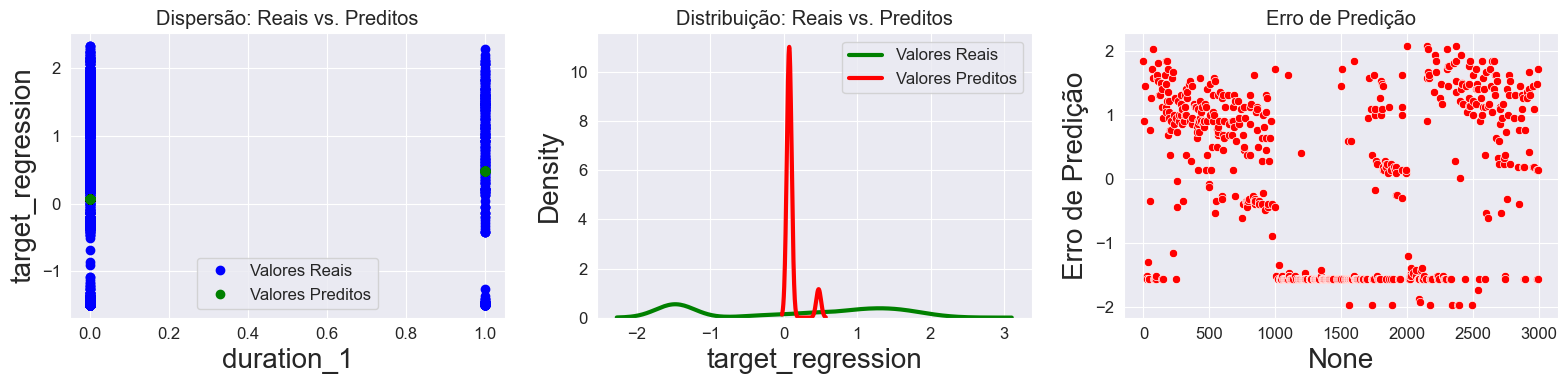

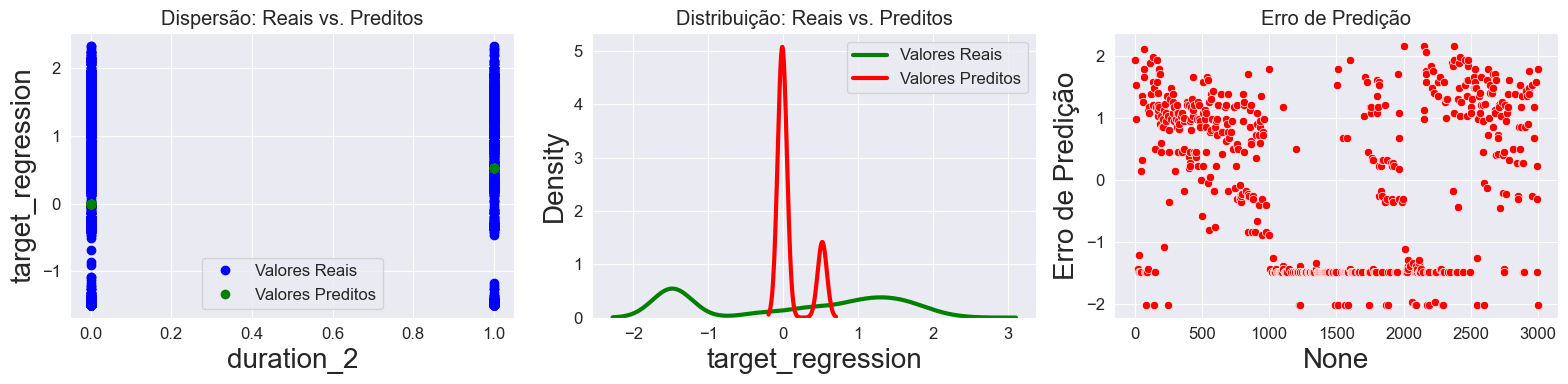

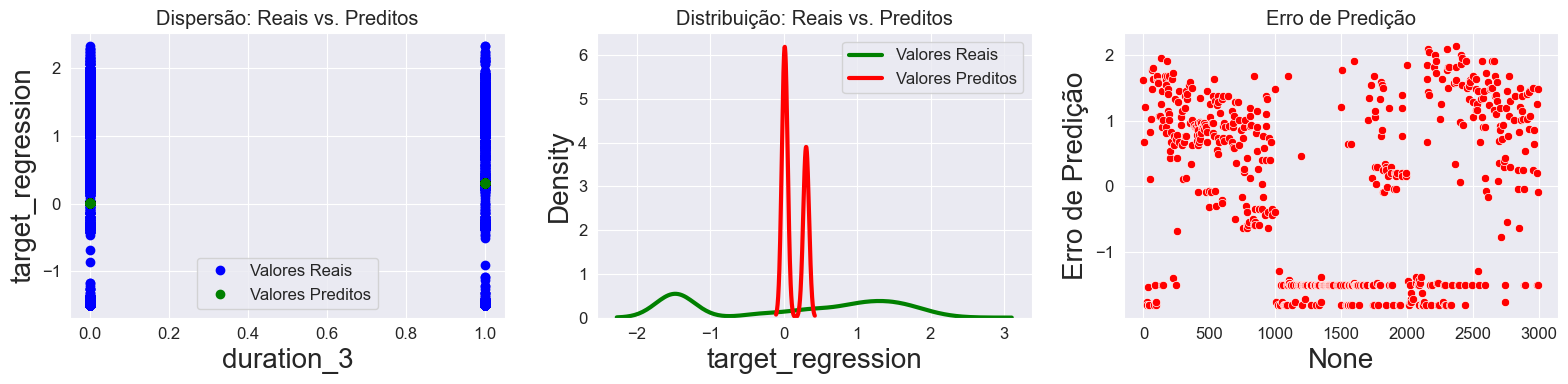

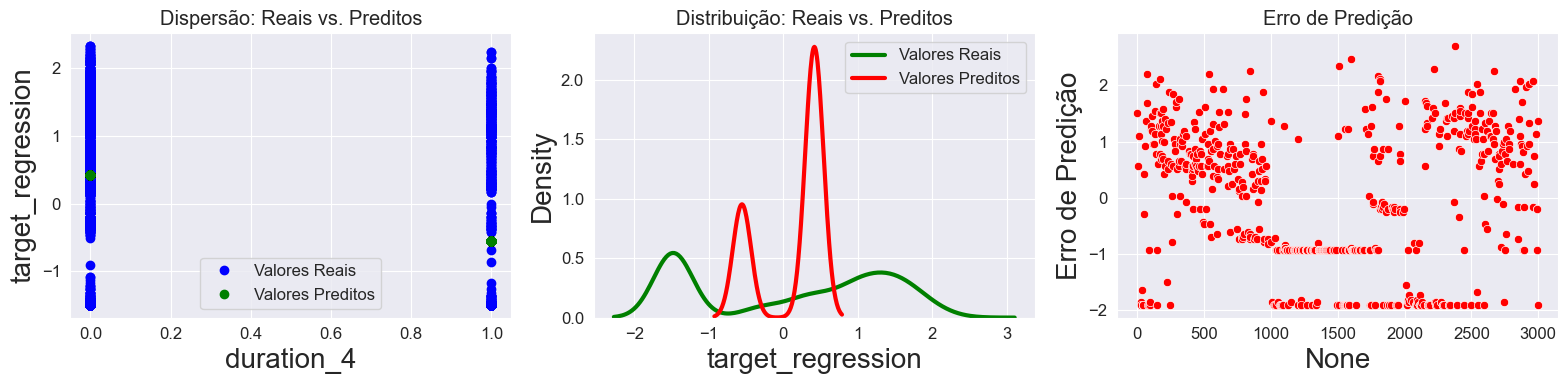

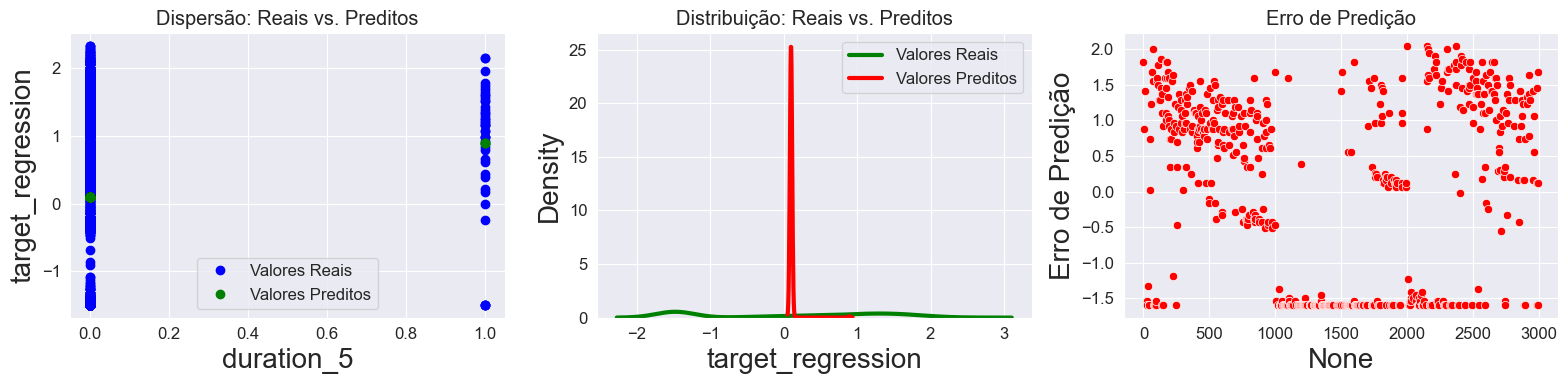

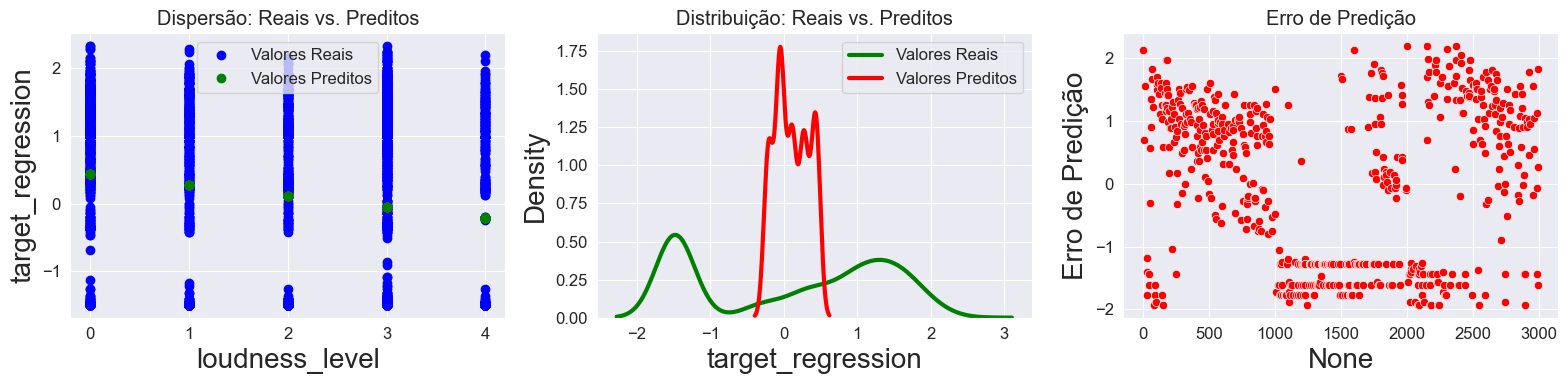

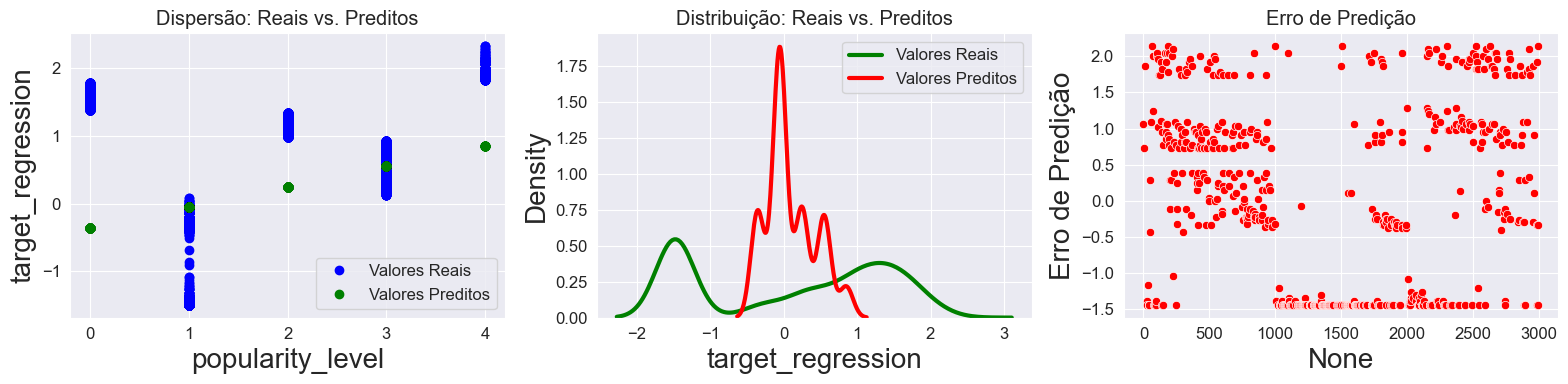

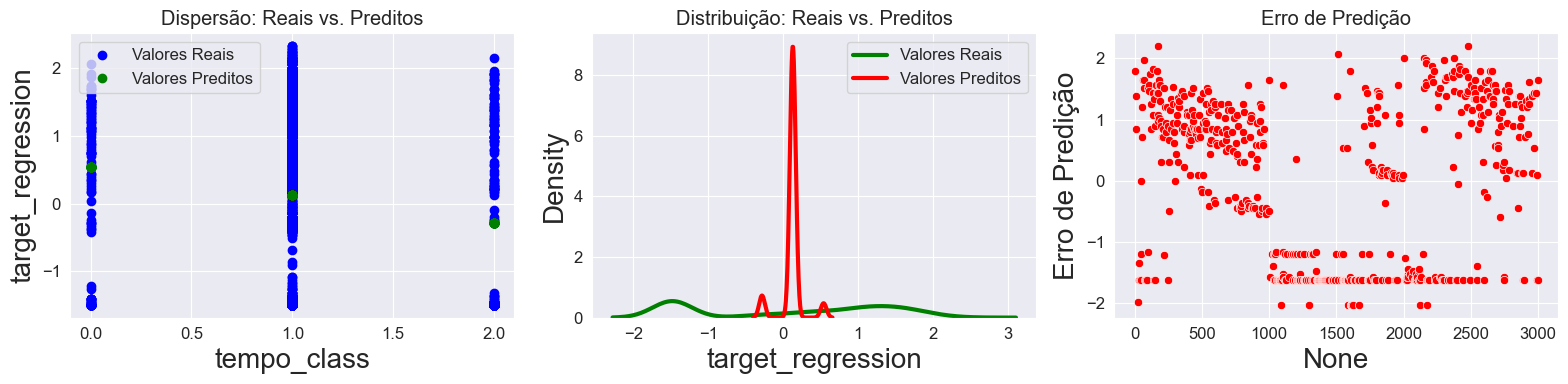

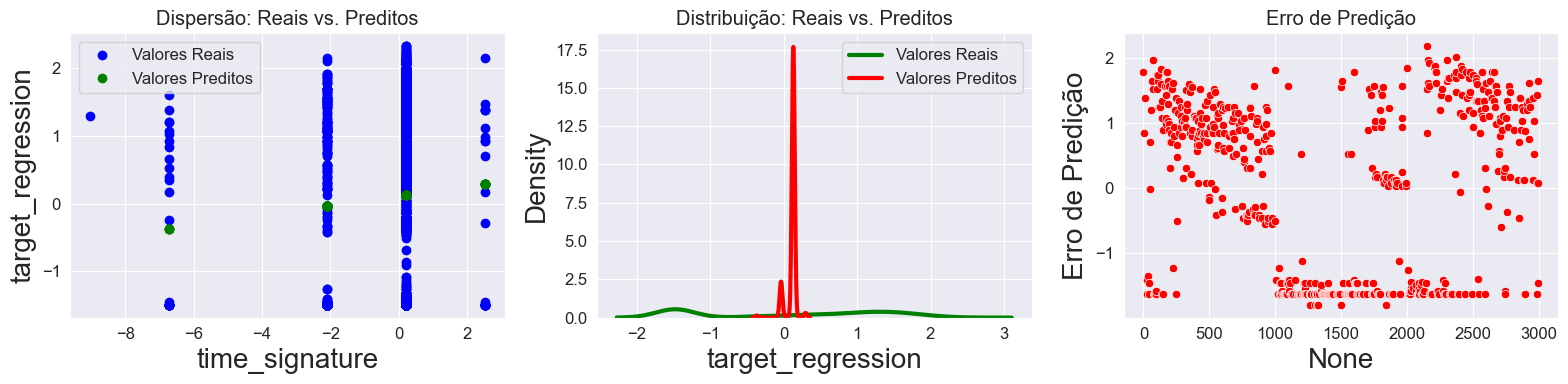

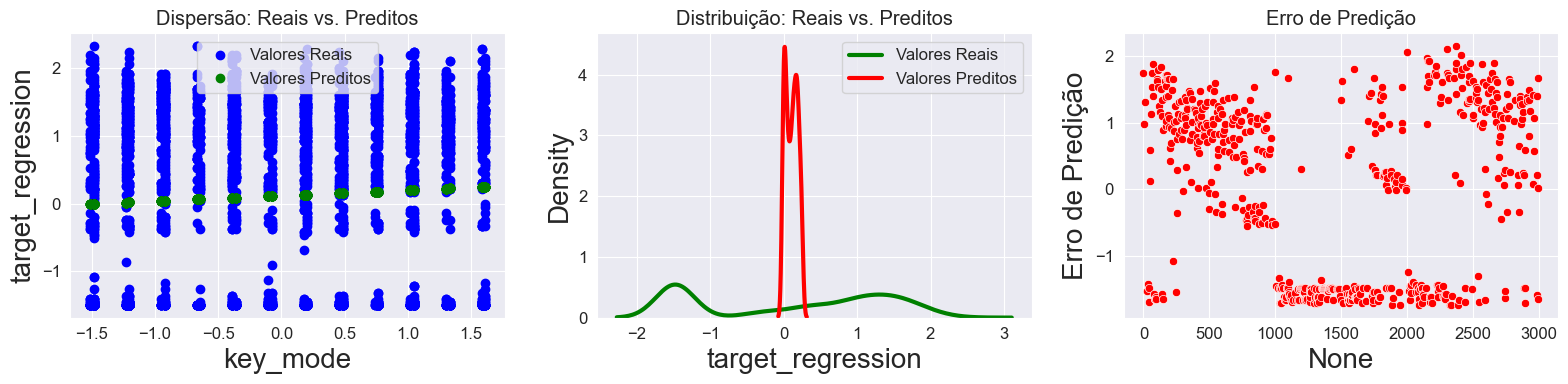

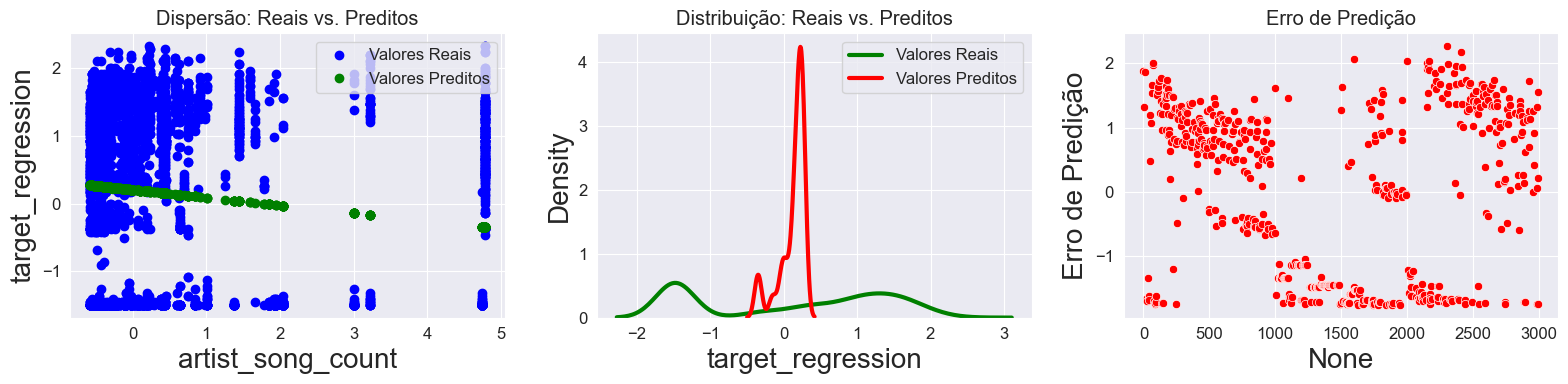

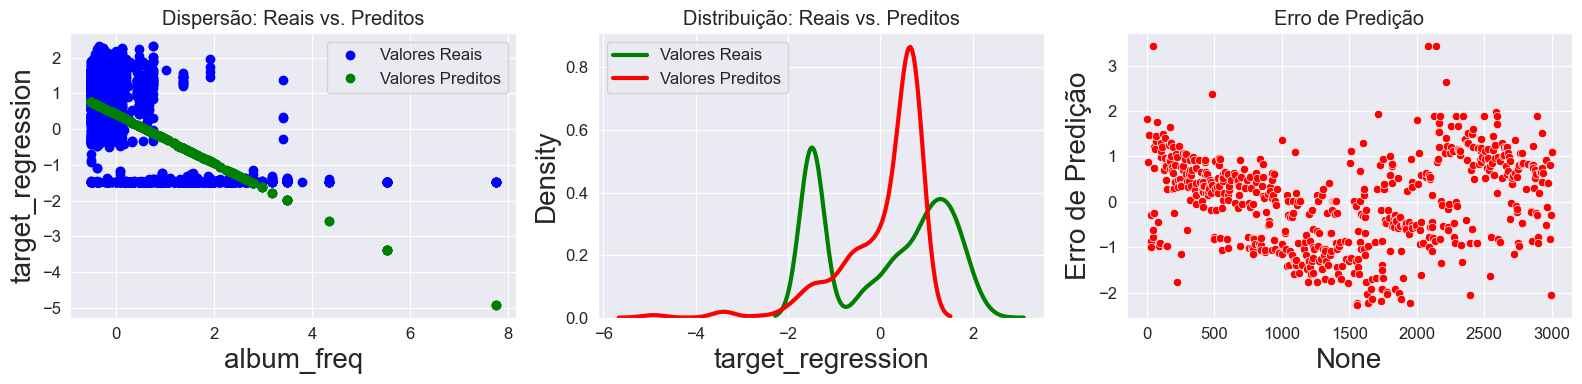

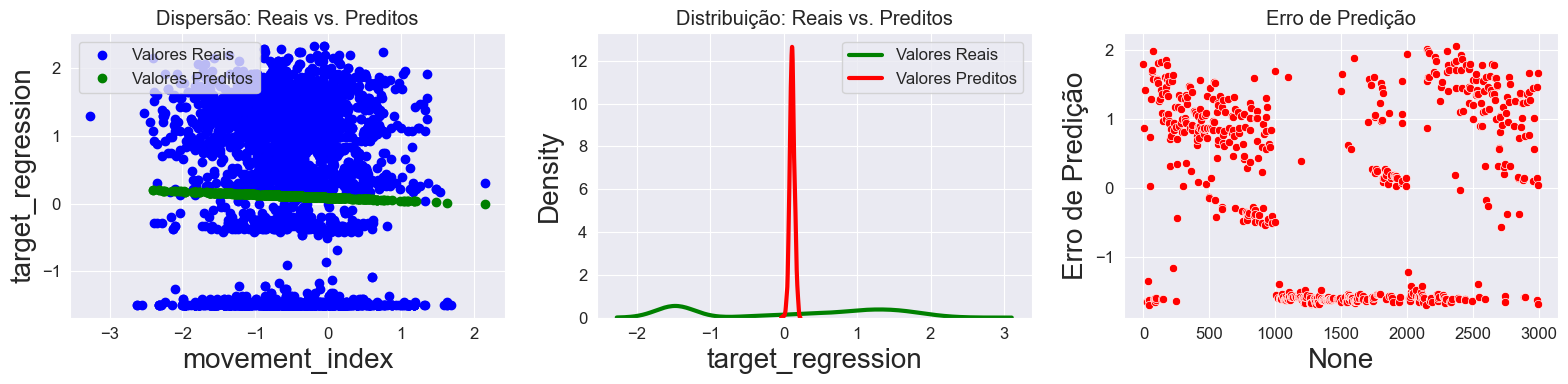

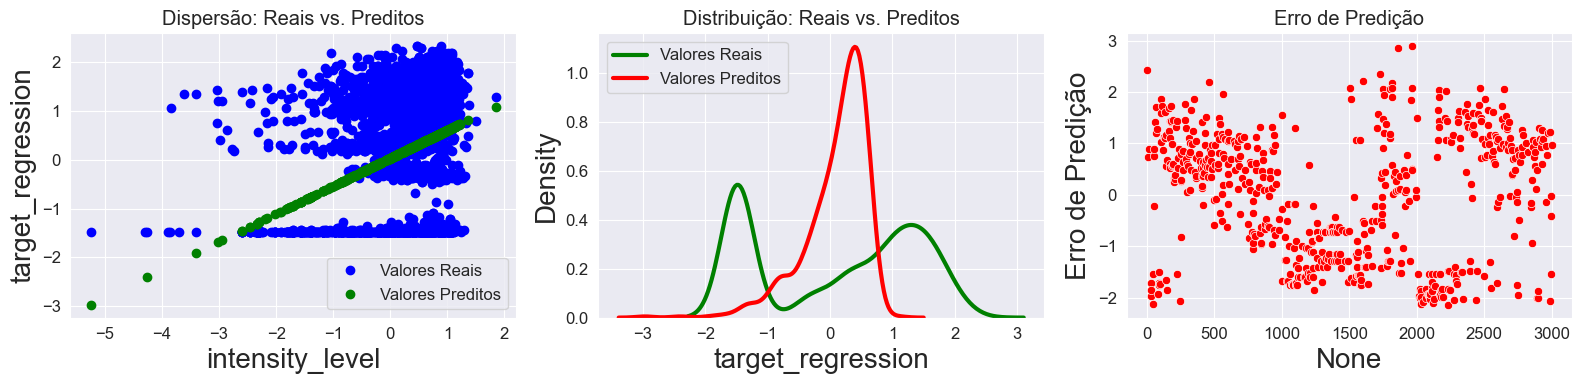

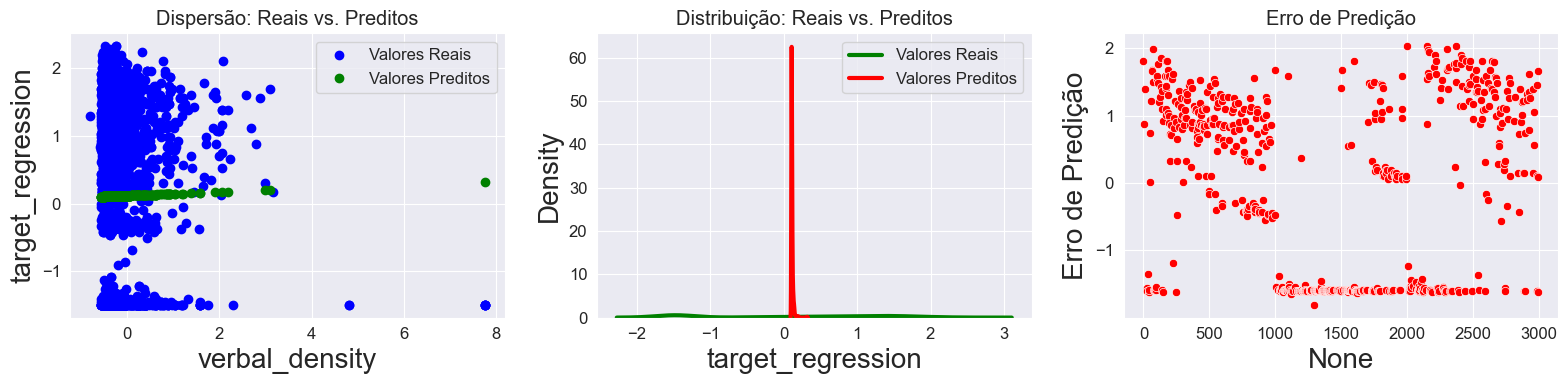

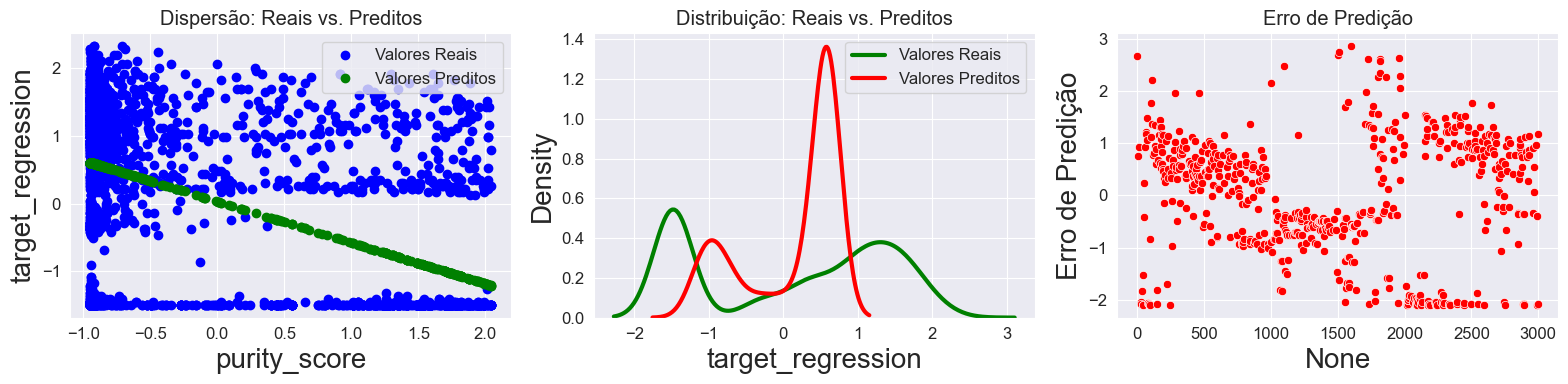

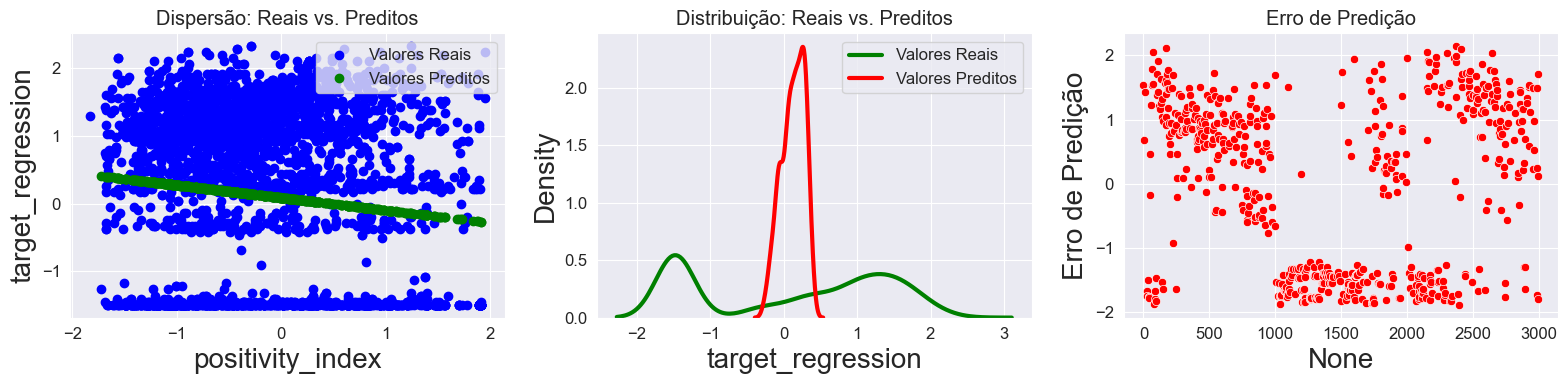

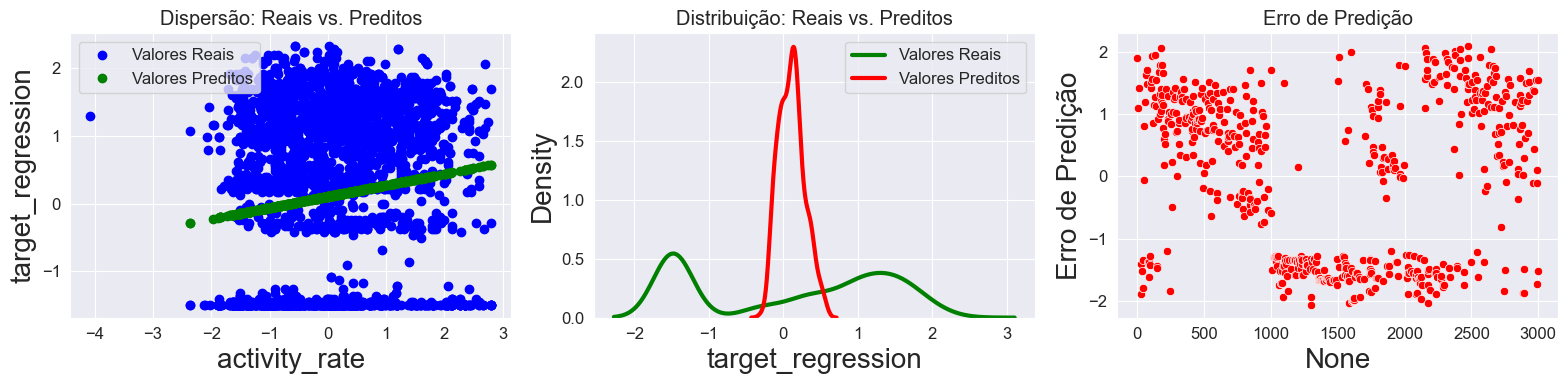

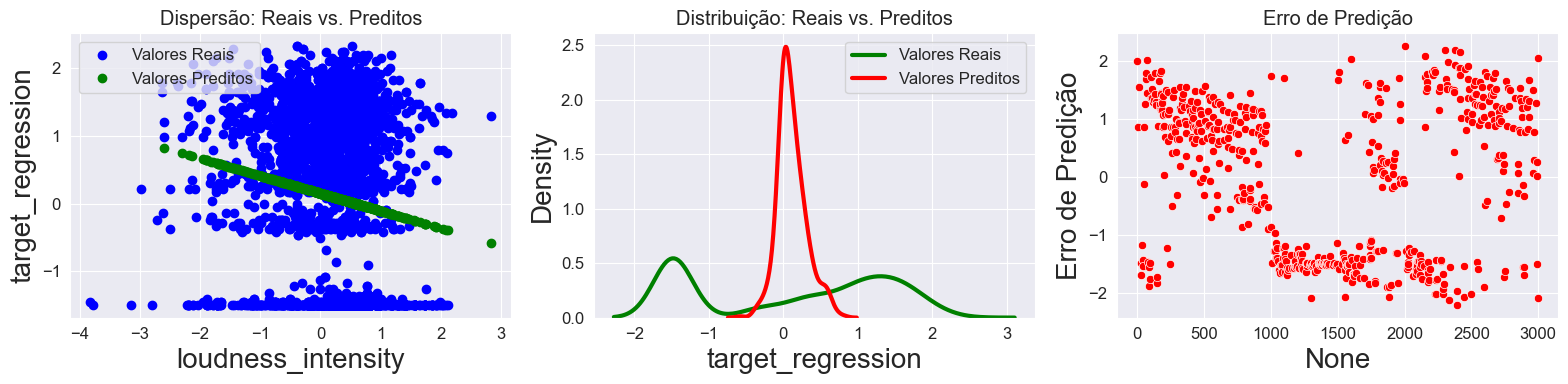

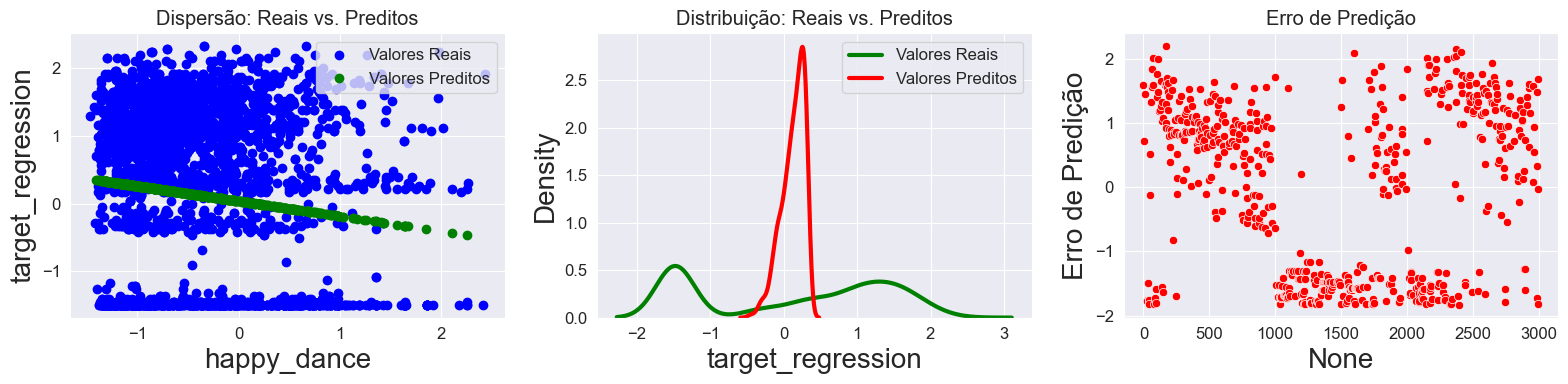

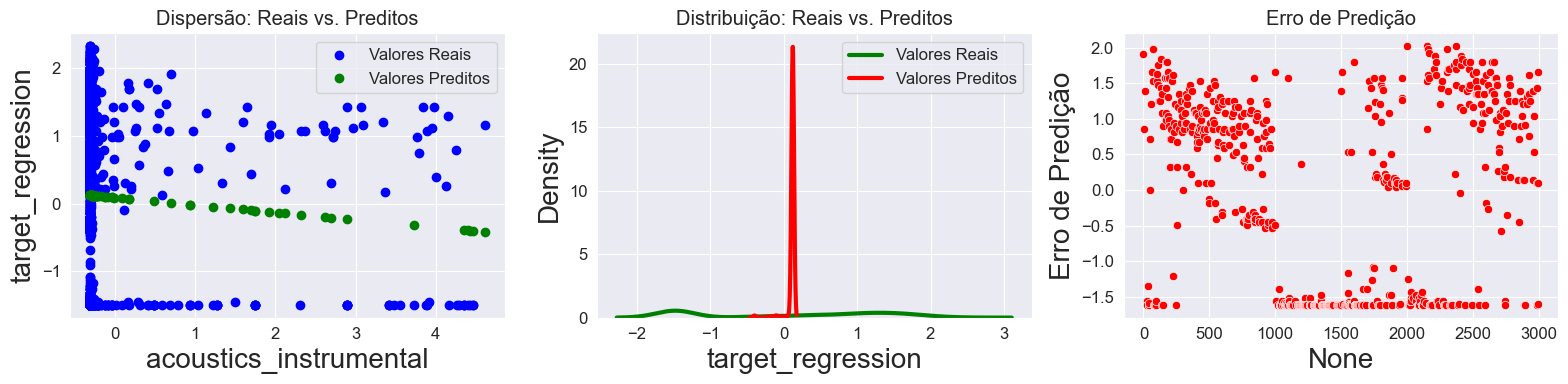

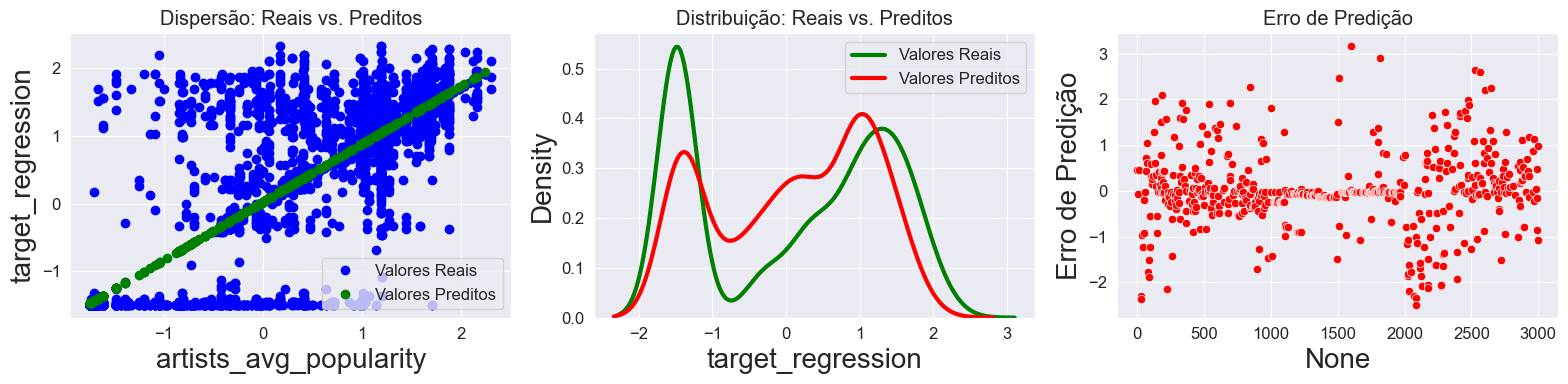

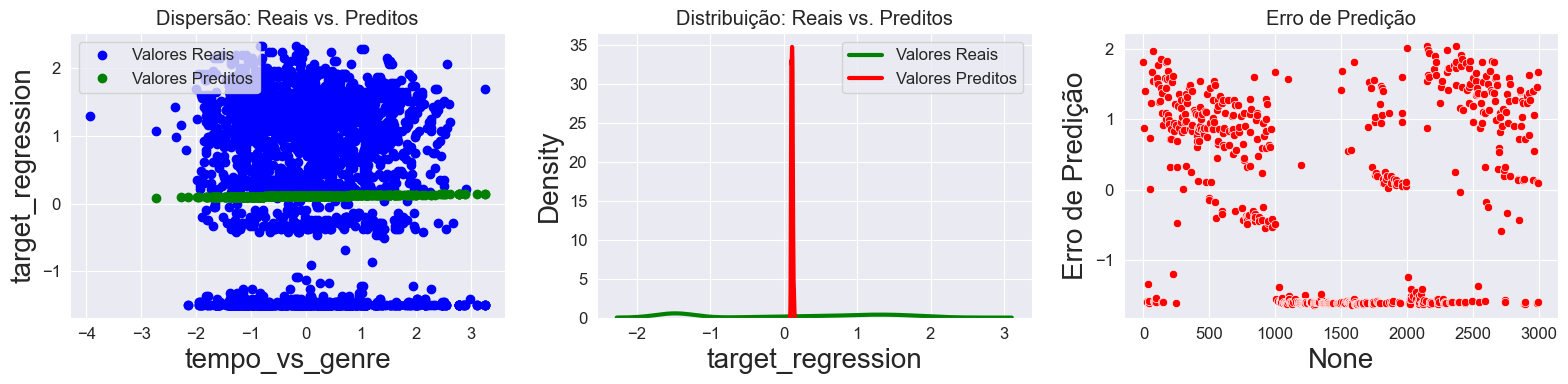

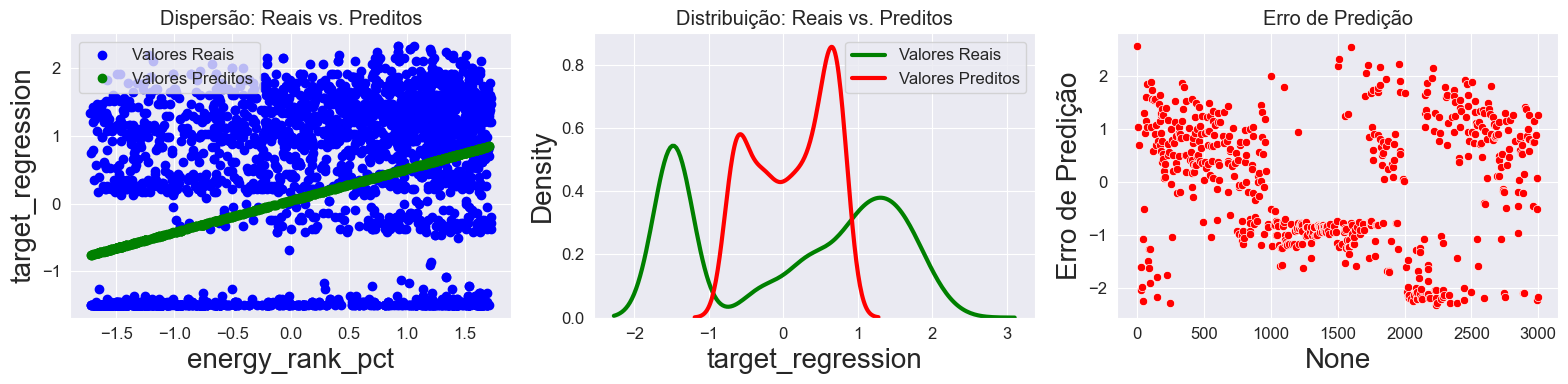

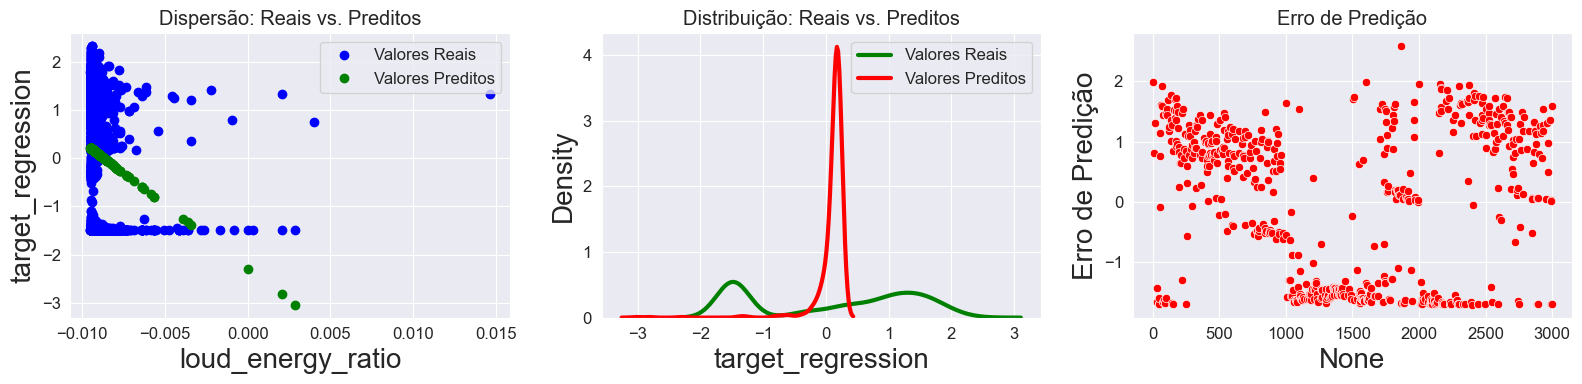

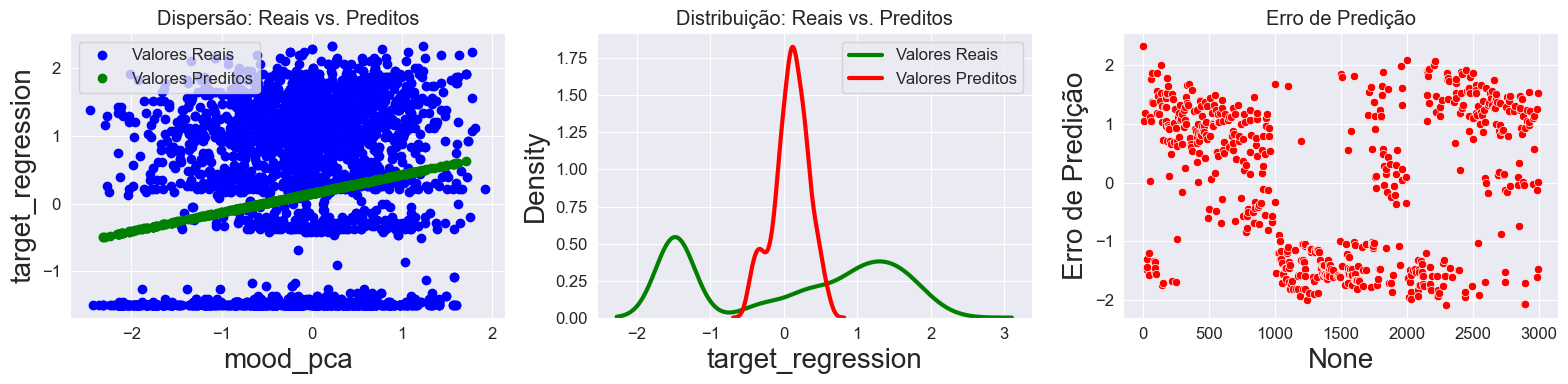

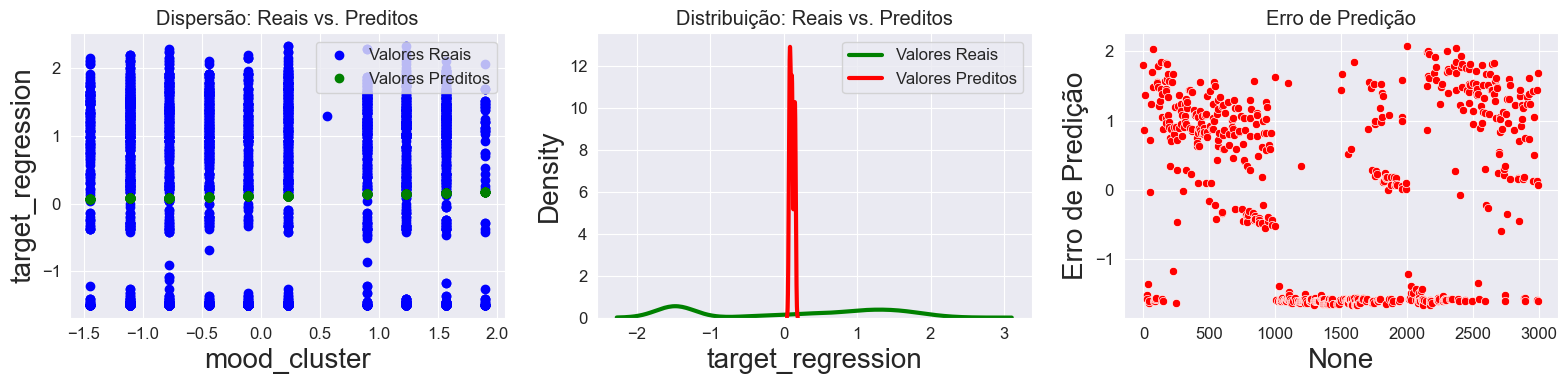

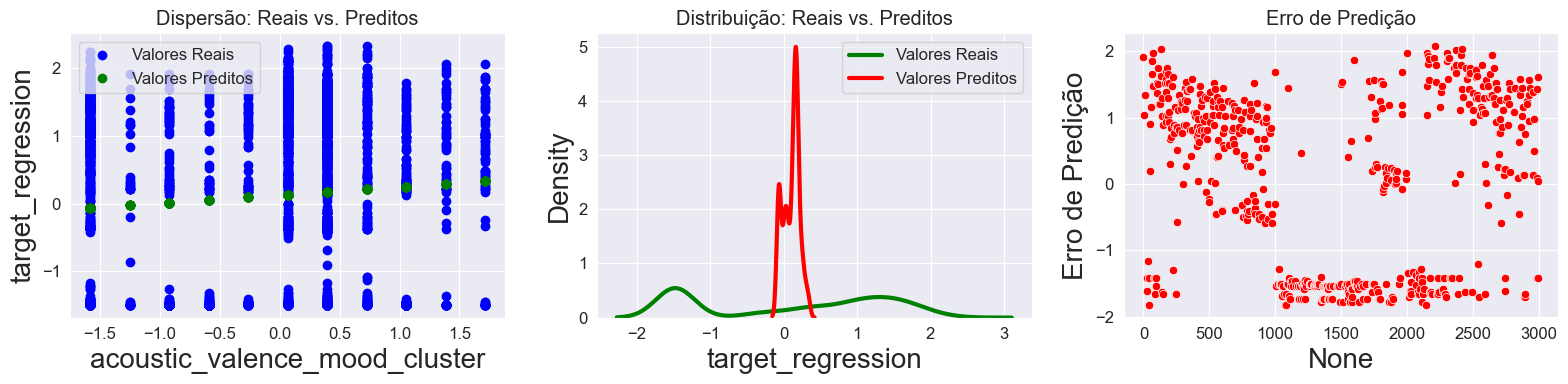

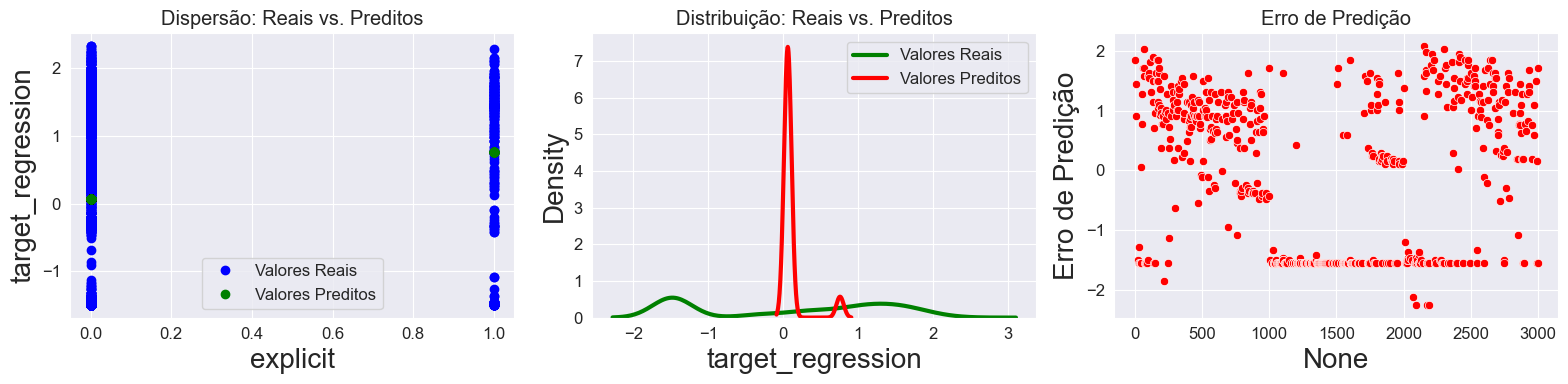

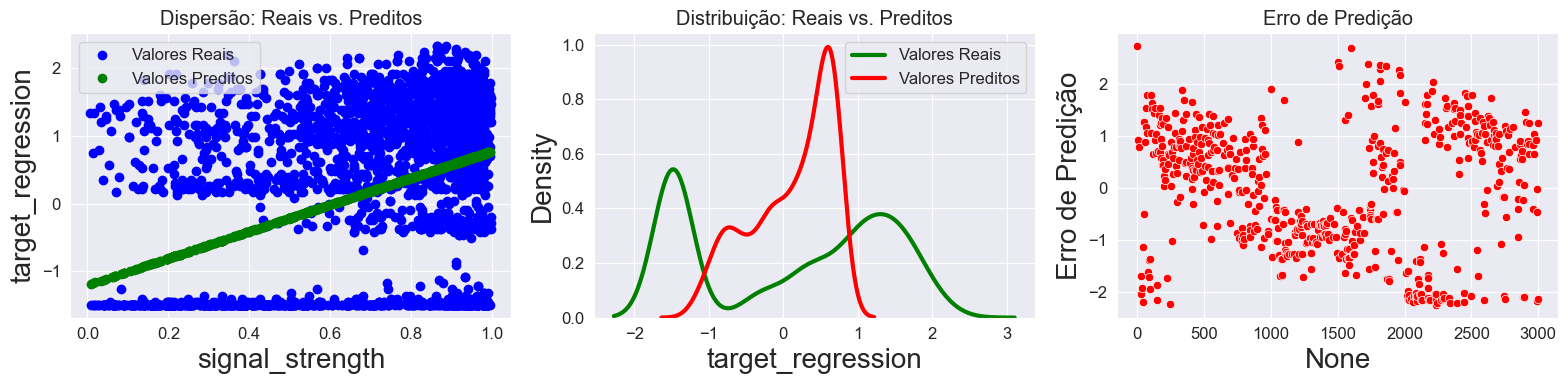

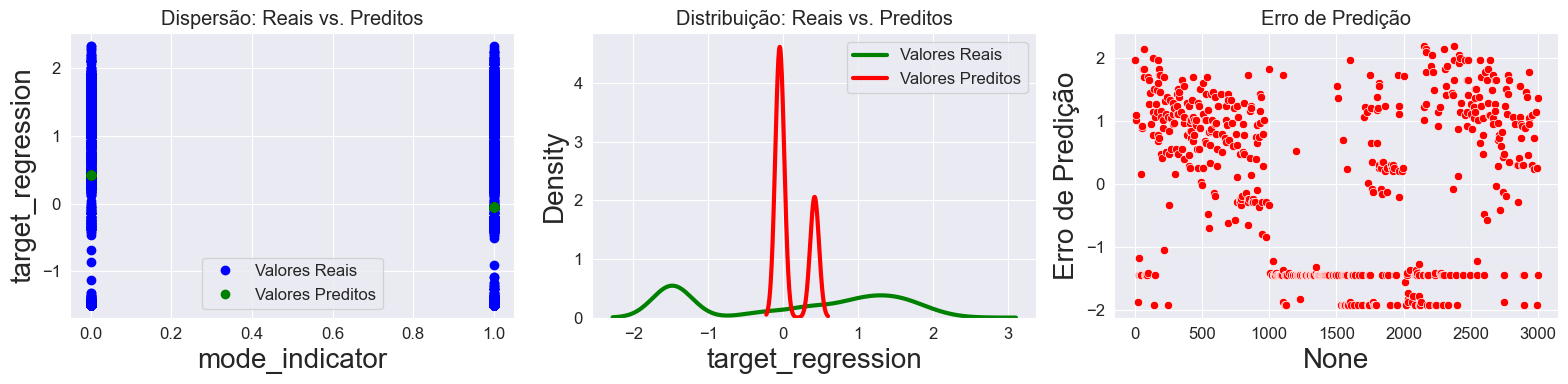

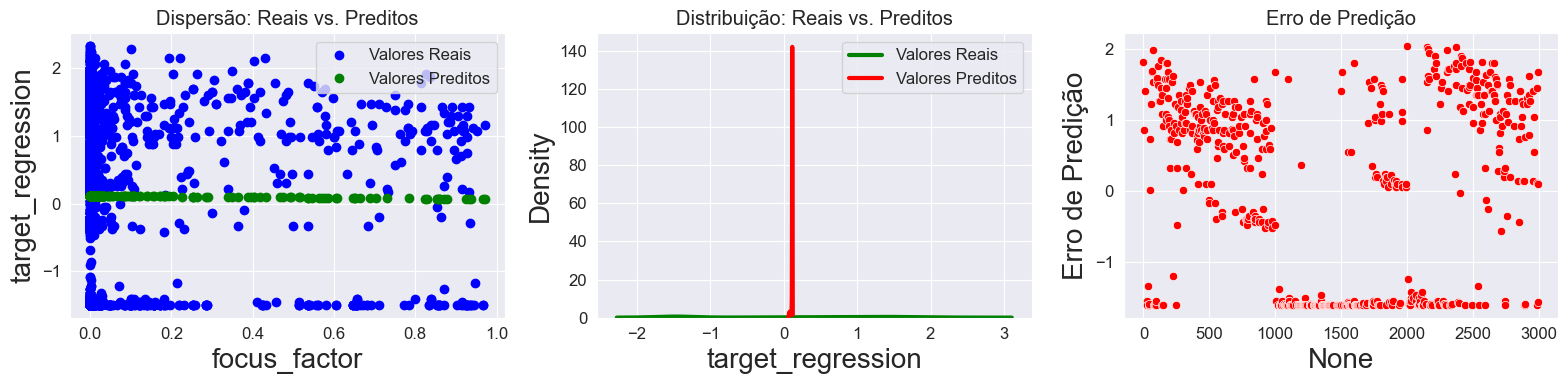

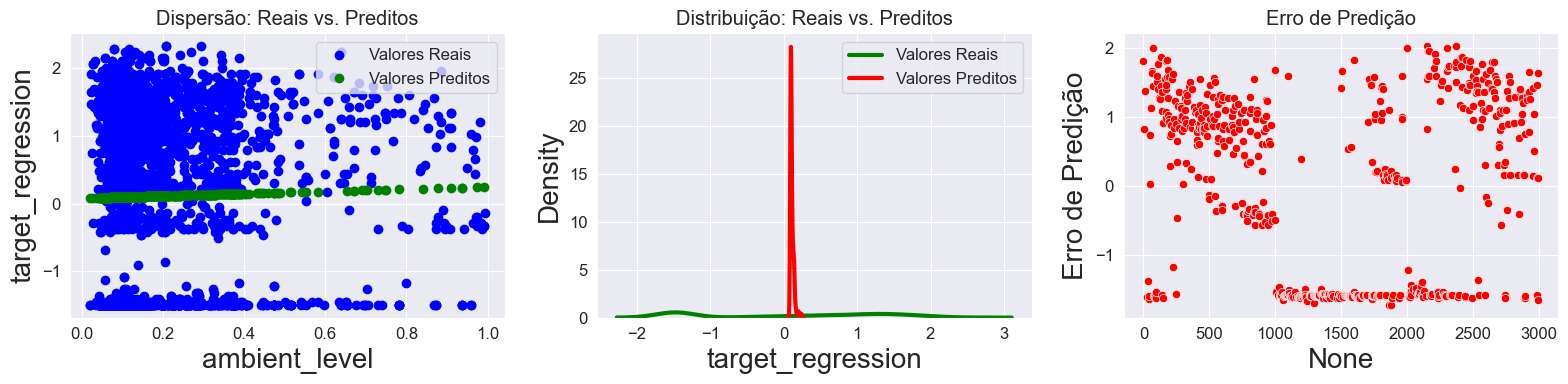

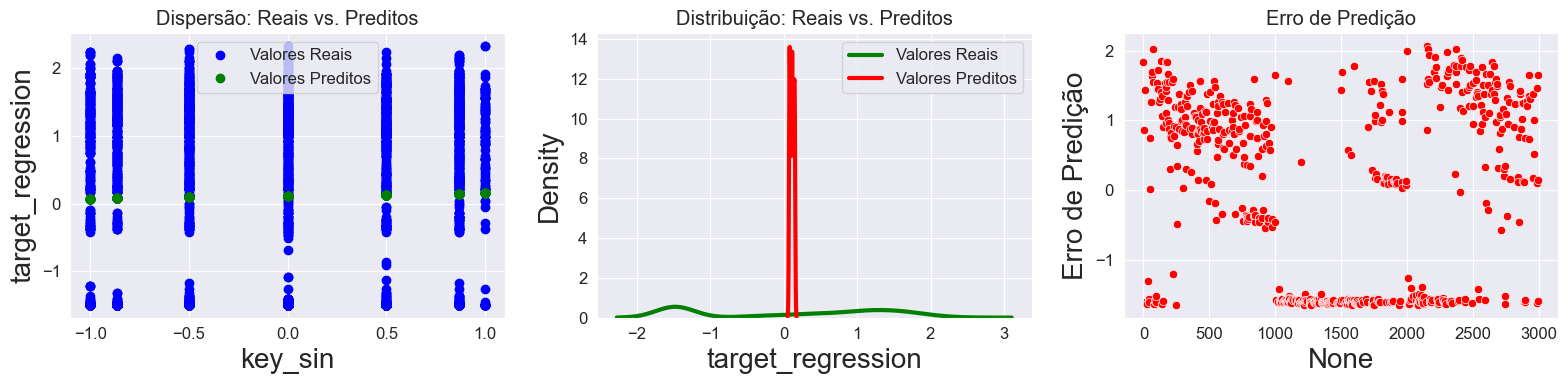

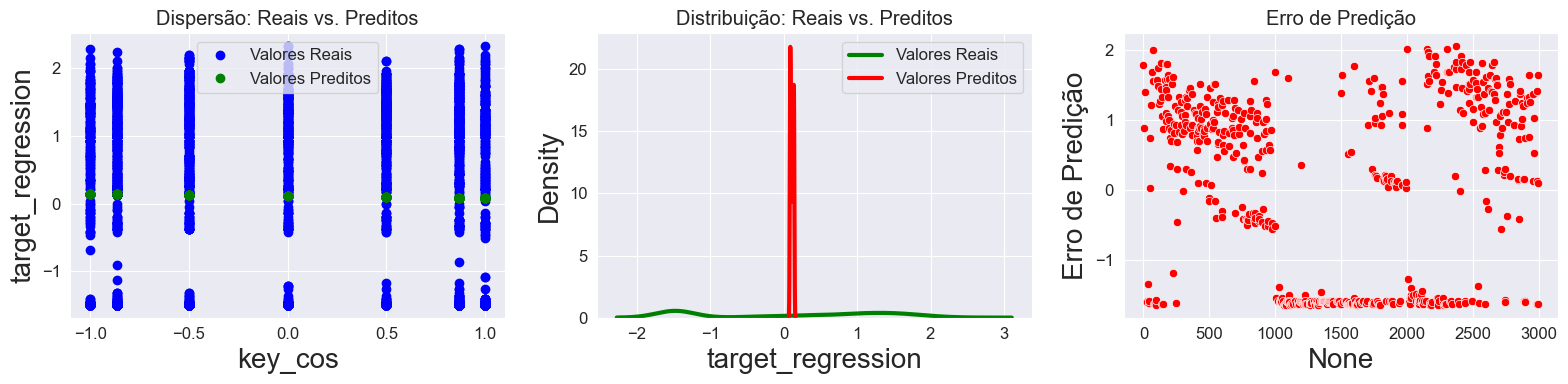

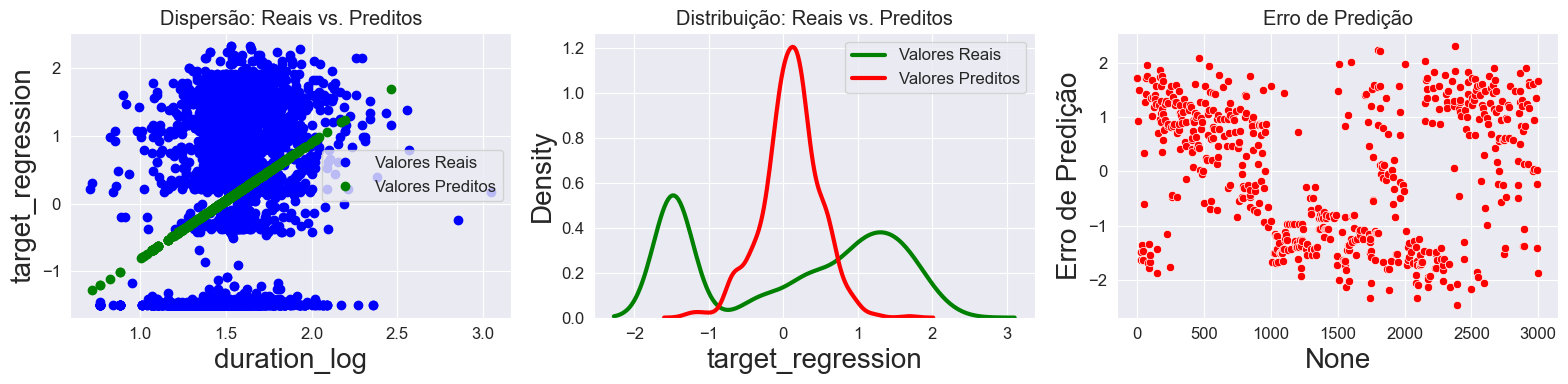

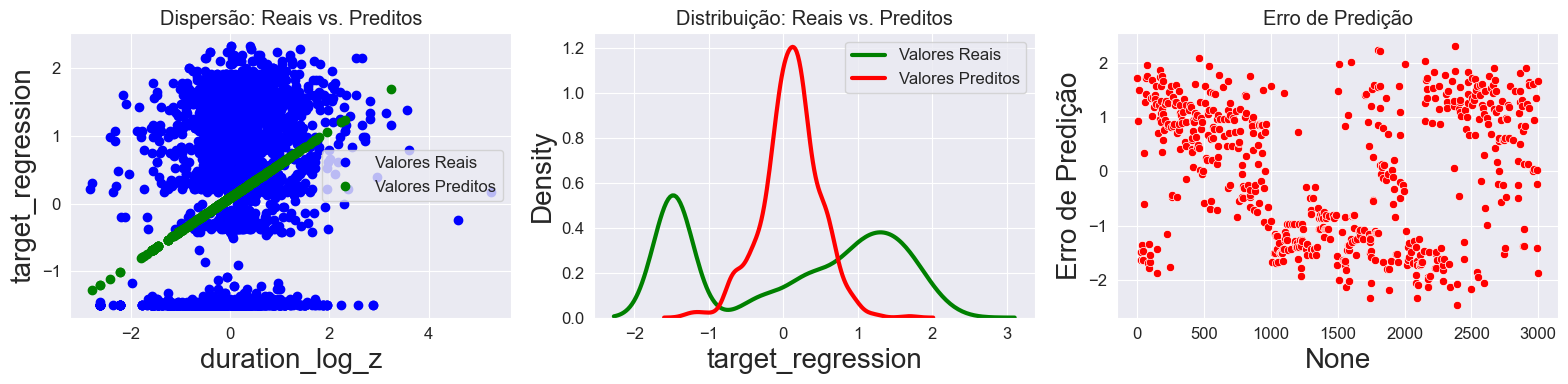

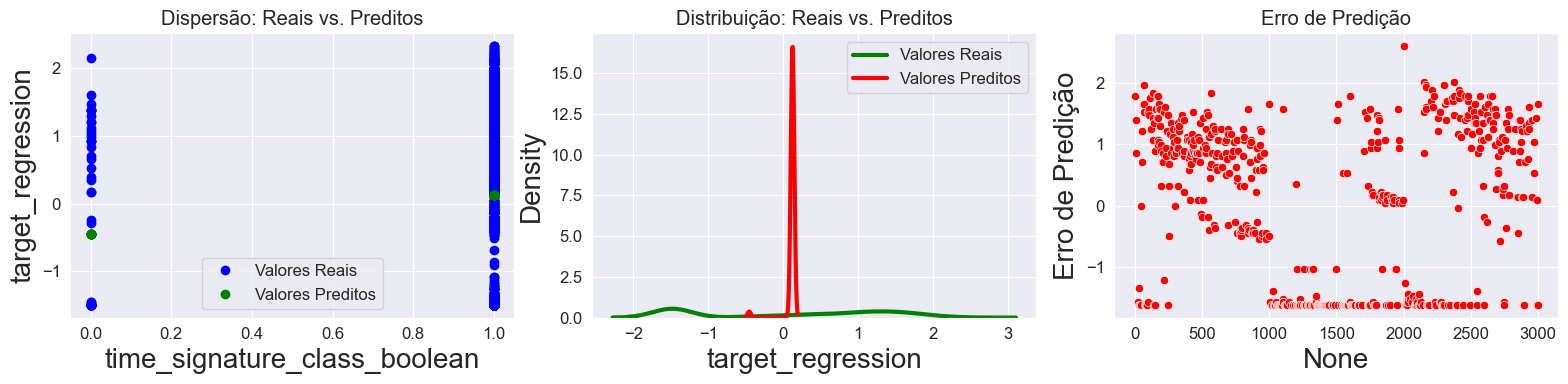

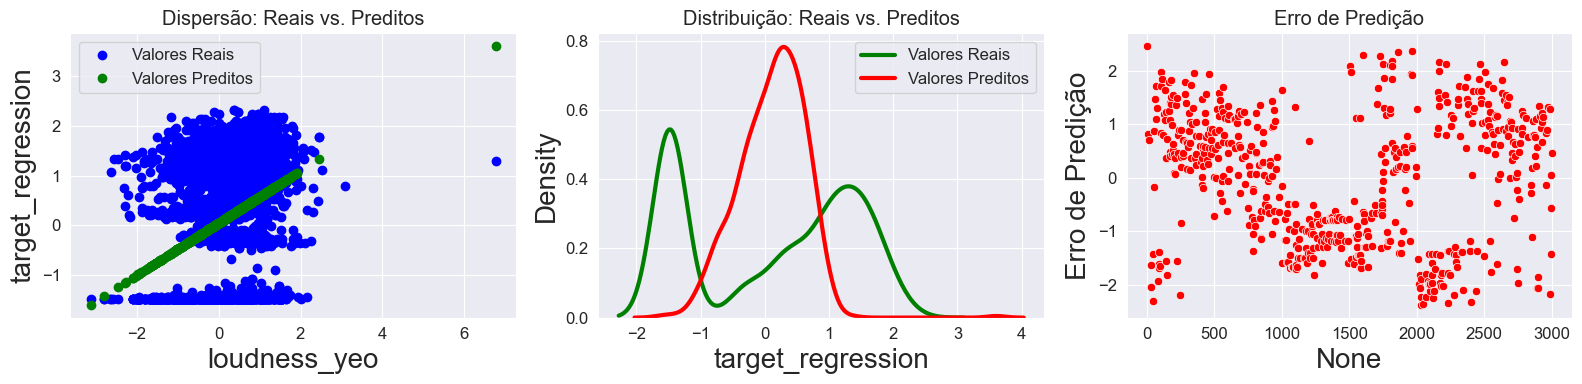

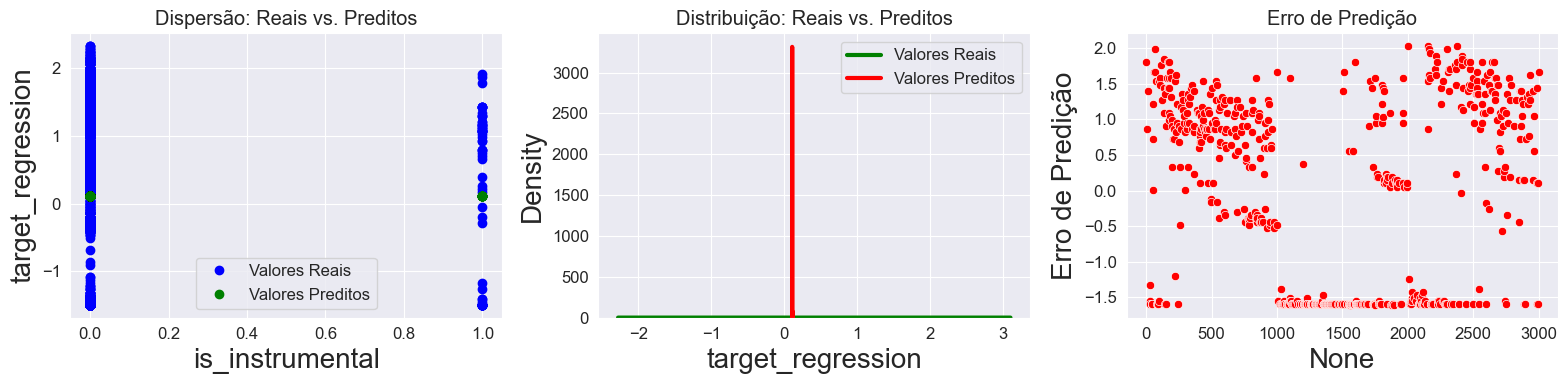

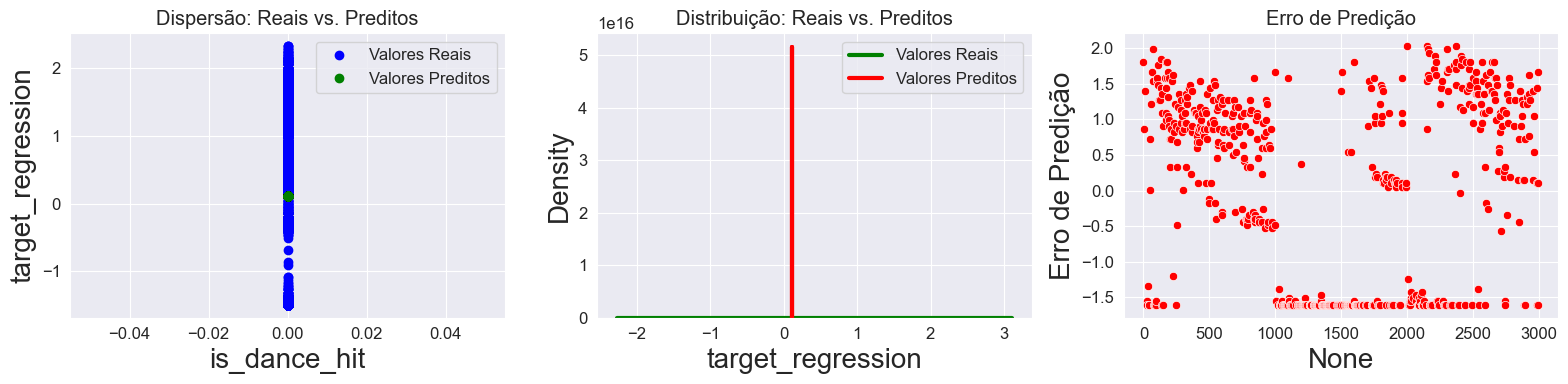

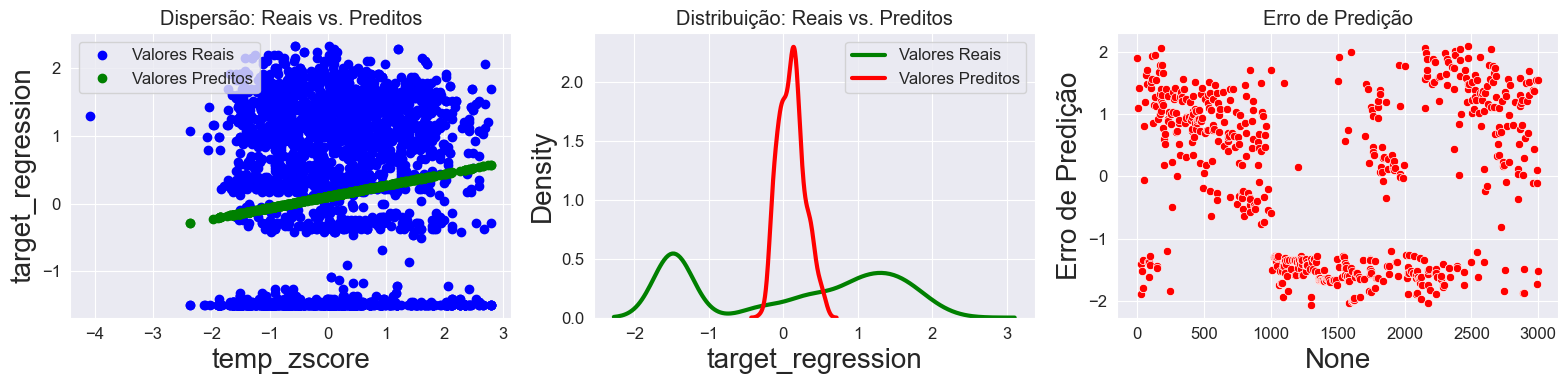

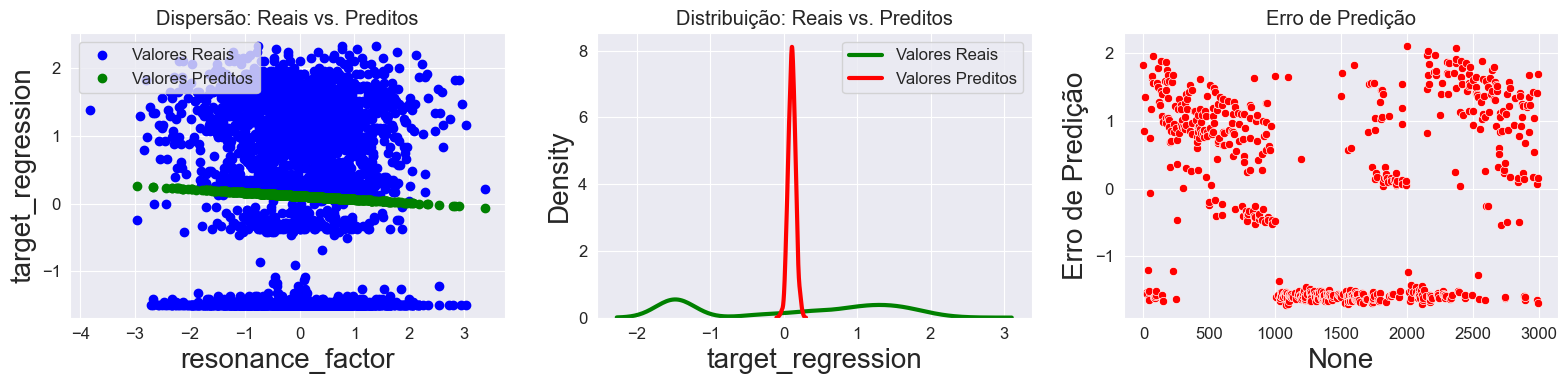

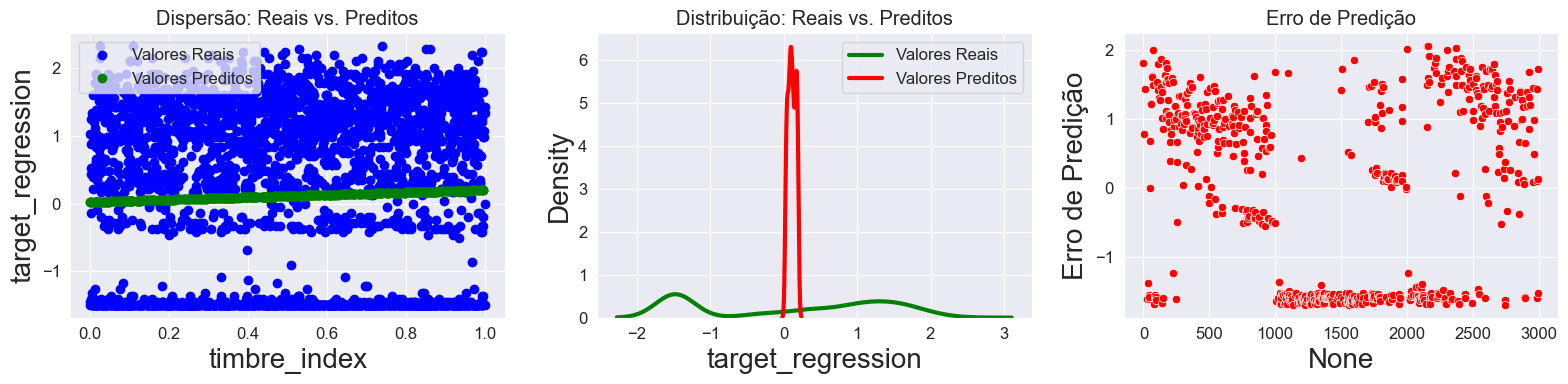

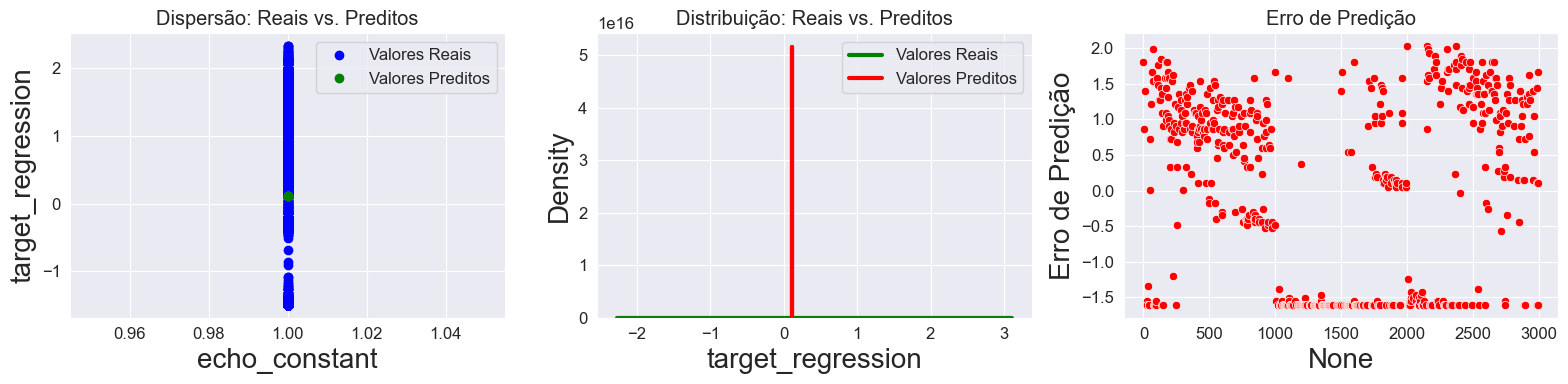

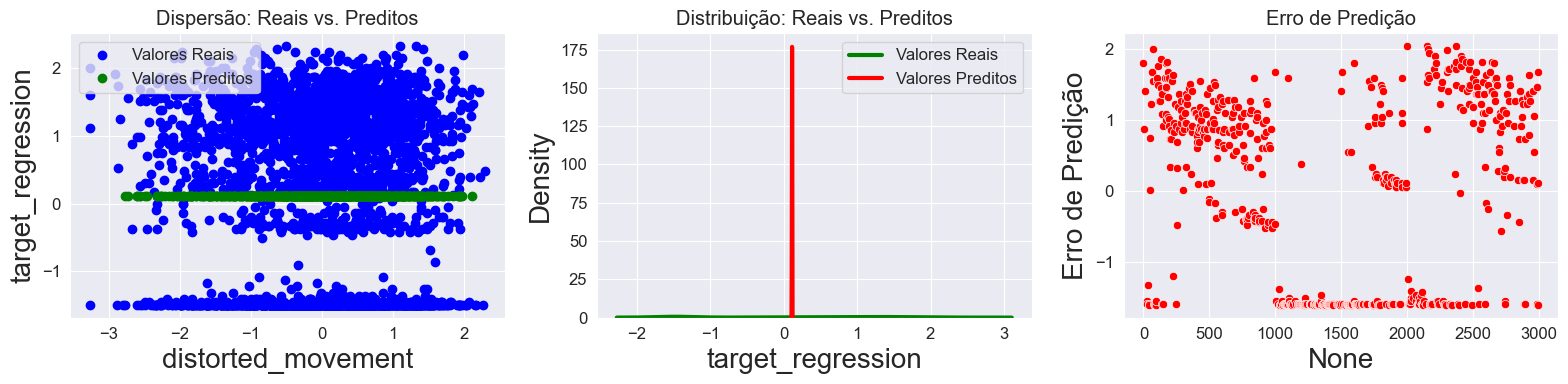

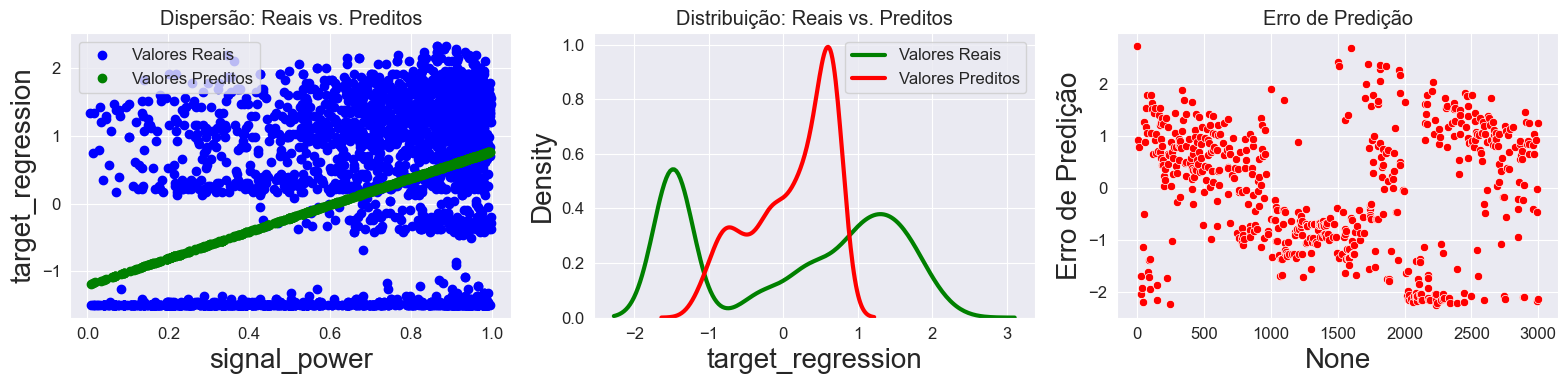

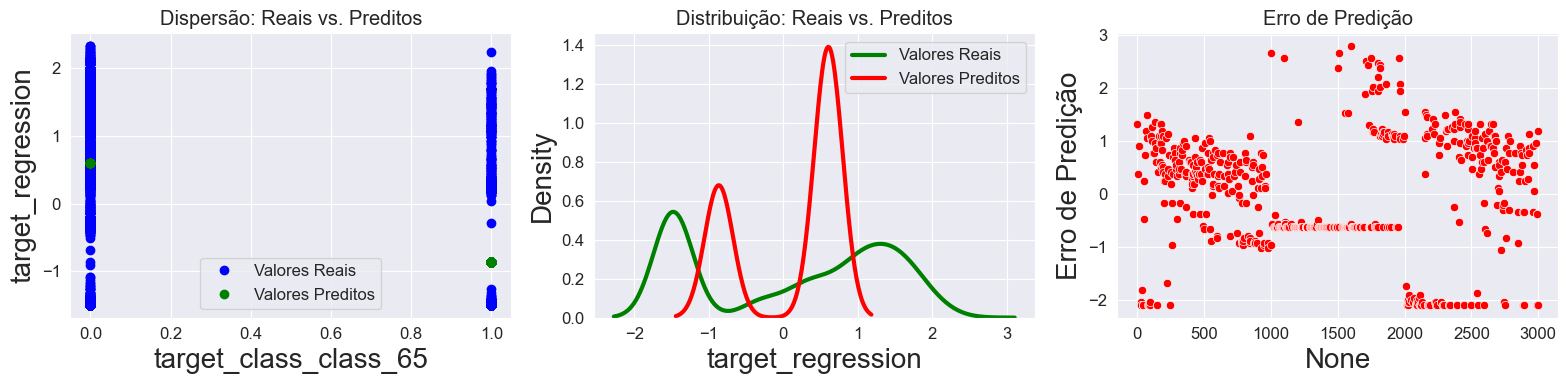

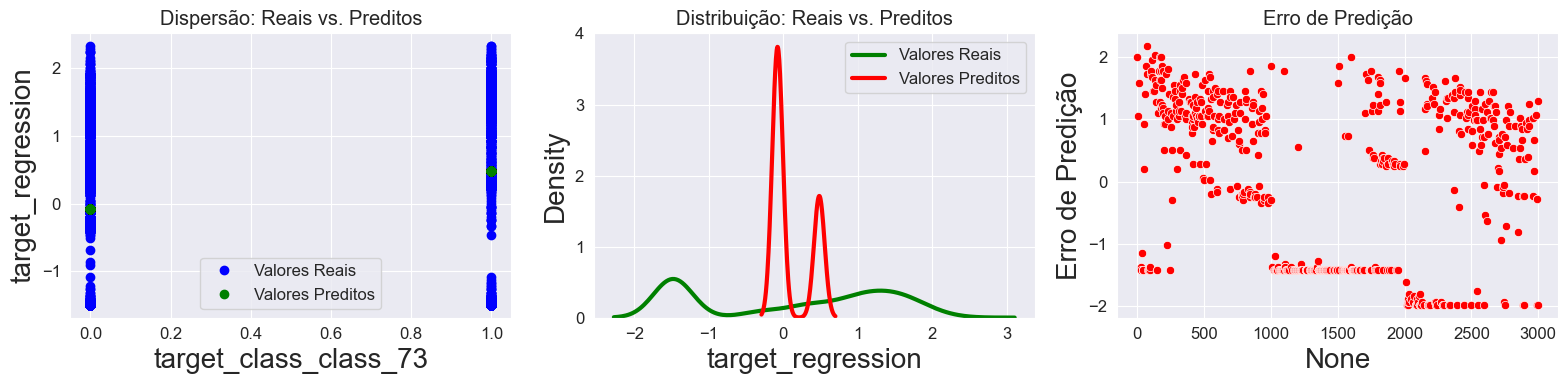

                          feature        R2       MSE       MAE
21         artists_avg_popularity  0.629417  0.635392  0.508271
11                     album_freq  0.411544  1.008952  0.838098
47          target_class_class_65  0.294397  1.209809  0.923199
15                   purity_score  0.228800  1.322281  0.965908
46                   signal_power  0.193047  1.383581  1.022195
29                signal_strength  0.193047  1.383581  1.022195
23                energy_rank_pct  0.171868  1.419895  1.048430
38                   loudness_yeo  0.154659  1.449400  1.057444
13                intensity_level  0.150237  1.456983  1.060361
35                   duration_log  0.100997  1.541408  1.127950
36                 duration_log_z  0.100997  1.541408  1.127950
3                      duration_4  0.097766  1.546949  1.104272
24              loud_energy_ratio  0.068755  1.596690  1.156559
6                popularity_level  0.060363  1.611078  1.127220
5                  loudness_level  0.041

In [47]:
import matplotlib.pyplot as plt

features = [col for col in df_encoded.columns if col != "target_regression"]
resultados = []

y = df_encoded["target_regression"]

for feature in features:
    x = df_encoded[[feature]]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    slr = LinearRegression().fit(x_train, y_train)
    y_pred = slr.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    slr_error = y_test - y_pred
    df_encoded['slr_error'] = slr_error

    resultados.append({"feature": feature, "R2": r2, "MSE": mse, "MAE": mae})

    # # Gráfico de regressão
    # plt.figure()
    # plt.scatter(x_test, y_test, color="blue", label="Real")
    # plt.plot(x_test, y_pred, color="red", label="Regressão Linear")
    # plt.title(f"Regressão Linear - {feature}")
    # plt.xlabel(feature)
    # plt.ylabel("target_regression")
    # plt.legend()
    # plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(16, 4))

    # Gráfico de dispersão
    axes[0].plot(x, y, 'bo', label='Valores Reais')
    axes[0].plot(x_test, y_pred, 'go', label='Valores Preditos')
    axes[0].set_title("Dispersão: Reais vs. Preditos")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("target_regression")
    axes[0].legend()

    # Gráfico de distribuição (usando kdeplot)
    sns.kdeplot(y, color="g", label="Valores Reais", ax=axes[1])
    sns.kdeplot(y_pred, color="r", label="Valores Preditos", ax=axes[1])
    axes[1].set_title("Distribuição: Reais vs. Preditos")
    axes[1].legend()

    # Gráfico de erro de predição
    sns.scatterplot(x=y.index, y='slr_error', data=df_encoded, color="r", ax=axes[2])
    axes[2].set_title("Erro de Predição")
    axes[2].set_ylabel("Erro de Predição")

    fig.tight_layout()
    plt.show()

df_resultados = pd.DataFrame(resultados).sort_values(by="R2", ascending=False)
print(df_resultados)

O melhor feature, segundo o R², é **artists_avg_popularity**, pois possui o maior **valor de R² (0.629417)**. Isso indica que ele explica melhor a variabilidade do alvo na regressão, comparado aos outros. Além de ele <u>também apresentar os menores valores de MSE e MAE</u>, reforçando sua qualidade como preditor.